In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1269.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1385.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1383.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1354.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1339.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1380.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1304.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1340.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1211.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1355.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1222.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1

In [5]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data as td
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import image
from matplotlib import pyplot
import time
import torch.optim as optim

In [6]:
def load_data(path, batch_size, input_size):
    
    transform_dict={'src':transforms.Compose([transforms.CenterCrop(224), transforms.RandomRotation(5), transforms.RandomHorizontalFlip(),
                                              transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])}
    data1 = datasets.ImageFolder(root=path,transform=transform_dict['src'])
    data_loader=td.DataLoader(data1,batch_size,shuffle=True,drop_last=False,num_workers=0)  
    return data_loader

train_loader3=load_data(path=r'/kaggle/input/vegetable-image-dataset/Vegetable Images/train/', batch_size=32, input_size=[64,64])
test_loader3=load_data(path=r'/kaggle/input/vegetable-image-dataset/Vegetable Images/test/', batch_size=32, input_size=[64,64])
val_loader3=load_data(path=r'/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/', batch_size=32, input_size=[64,64])

In [7]:
model3 = torch.hub.load('pytorch/vision:v0.10.0', 'googlenet',pretrained=False)
optimizer3 = torch.optim.Adam(model3.parameters(),lr=0.001)
criterion3 = nn.CrossEntropyLoss()

Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /root/.cache/torch/hub/v0.10.0.zip
/opt/conda/lib/python3.7/site-packages/torchvision/models/googlenet.py:50: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  FutureWarning,


In [8]:
def train( model, train_loader,val_loader, criterion, optimizer,num_epochs):
      device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
      print("Device: {}".format(device))
      model.to(device)
      total_steps = len(train_loader)
      model.aux_logits=False
      t1 = time.time()
      accuracy1 = []
      loss1 = []
      val_acc=[]
      val_loss=[]
      for epoch in range(num_epochs):
          accu = 0
          lss = 0
          val_accu=0
          valid_loss=0
          for i,data in enumerate(train_loader):
              images, labels = data[0].to(device), data[1].to(device)
              # Forward pass
              outputs = model(images)
              loss = criterion(outputs, labels)
              # Backprop and optimisation
              optimizer.zero_grad()
              loss.backward()
              optimizer.step()
              # Train accuracy
              total = labels.size(0)
              _,predicted = torch.max(outputs.data, 1)
              correct = (predicted == labels).sum().item()
              accu += (correct / total) * 100
              lss += loss.item()
          model.eval()  
          for i, data in enumerate(val_loader):
              val_images, val_labels = data[0].to(device), data[1].to(device)
              outputs = model(val_images)
              loss = criterion(outputs, val_labels)
              # Val accuracy
              total = val_labels.size(0)
              _,predicted = torch.max(outputs.data, 1)
              correct = (predicted == val_labels).sum().item()
              val_accu += (correct / total) * 100
              valid_loss += loss.item()
          val_acc.append(val_accu/len(val_loader))
          val_loss.append(valid_loss/len(val_loader))
          accuracy1.append(accu/len(train_loader))
          loss1.append(lss/len(train_loader))
          
          print('Epoch [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%, Validation Loss : {:.4f}, Validation Accuracy : {:.2f}%,'.format(epoch + 1, num_epochs,lss/len(train_loader) ,accu/len(train_loader), valid_loss/len(val_loader), val_accu/len(val_loader)))
      print("######## Training Finished in {} seconds ###########".format(time.time()-t1))
      return model, accuracy1, loss1,val_acc,val_loss

In [9]:
model3,accuracy3,loss3,val_acc3,val_loss3=train(model3, train_loader3,val_loader3, criterion3, optimizer3,num_epochs=30)

Device: cuda:0


/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


Epoch [1/30], Loss: 1.3559, Accuracy: 54.71%, Validation Loss : 0.8371, Validation Accuracy : 69.47%,
Epoch [2/30], Loss: 1.9729, Accuracy: 31.67%, Validation Loss : 1.6983, Validation Accuracy : 40.48%,
Epoch [3/30], Loss: 1.2920, Accuracy: 55.92%, Validation Loss : 1.0501, Validation Accuracy : 63.86%,
Epoch [4/30], Loss: 0.9975, Accuracy: 65.97%, Validation Loss : 0.8283, Validation Accuracy : 70.00%,
Epoch [5/30], Loss: 0.7760, Accuracy: 73.66%, Validation Loss : 0.7125, Validation Accuracy : 75.49%,
Epoch [6/30], Loss: 0.6673, Accuracy: 77.50%, Validation Loss : 0.6273, Validation Accuracy : 77.85%,
Epoch [7/30], Loss: 0.5679, Accuracy: 80.81%, Validation Loss : 0.5128, Validation Accuracy : 83.06%,
Epoch [8/30], Loss: 0.4939, Accuracy: 83.42%, Validation Loss : 0.5157, Validation Accuracy : 82.86%,
Epoch [9/30], Loss: 0.4087, Accuracy: 86.90%, Validation Loss : 0.6337, Validation Accuracy : 79.19%,
Epoch [10/30], Loss: 0.3611, Accuracy: 88.26%, Validation Loss : 0.4192, Validatio

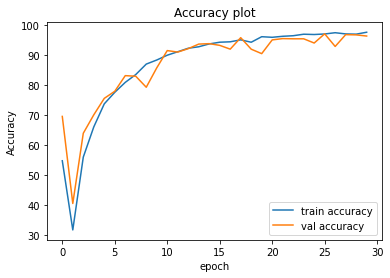

In [10]:
import matplotlib.pyplot as plt

num_epochs= 30
plt.figure()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy plot')
plt.plot(accuracy3,label='train accuracy')
plt.plot(val_acc3,label='val accuracy')    
plt.legend()

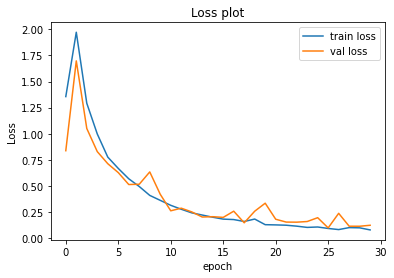

In [11]:
import matplotlib.pyplot as plt

num_epochs= 30
plt.figure()
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss plot')

plt.plot(loss3,label='train loss')
plt.plot(val_loss3,label='val loss')
    
plt.legend()

In [12]:
model3.eval() 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model3 = model3.to(device)
with torch.no_grad(): 
    correct = 0
    total = 0
    for data in test_loader3:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the {} test images: {} %'
        .format(total, (correct / total) * 100))

Test Accuracy of the model on the 3000 test images: 95.89999999999999 %


In [22]:
torch.save(model3, 'model_googlenet3.pt')

In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model3 = model3.to(device)
for data in enumerate(train_loader3):
              X, Y = data[0].to(device), data[1].to(device)
#X=images[:500].to(device)
#Y=labels[:500,0].to(device)
X=X.reshape(X.shape[0],X.shape[1]*X.shape[2])


print(X.shape)
print(Y.shape)

AttributeError: 'int' object has no attribute 'to'

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X_embedded = tsne.fit_transform(X)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter
#Make a scatter plot with X_embedded
plt_scatter_plot=plt.scatter(X_embedded[:,0],X_embedded[:,1],c=Y)
# Using Plt.scatter, visualize the transformed data marked with their corresponding label in 2D embedding.
plt.title('TSNE Visualization')
plt.xlabel('Dim_1')
plt.ylabel('Dim_2')
plt.show()
plt.close()

In [17]:
model4 = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18',pretrained=False)
optimizer4 = torch.optim.Adam(model4.parameters(),lr=0.001)
criterion4 = nn.CrossEntropyLoss()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


In [18]:
model4,accuracy4,loss4,val_acc4,val_loss4=train(model4, train_loader3,val_loader3, criterion4, optimizer4,num_epochs=30)

Device: cuda:0
Epoch [1/30], Loss: 1.0903, Accuracy: 65.28%, Validation Loss : 0.7061, Validation Accuracy : 77.07%,
Epoch [2/30], Loss: 0.8907, Accuracy: 71.26%, Validation Loss : 0.4872, Validation Accuracy : 84.53%,
Epoch [3/30], Loss: 0.4342, Accuracy: 86.11%, Validation Loss : 0.3641, Validation Accuracy : 89.10%,
Epoch [4/30], Loss: 0.2941, Accuracy: 90.79%, Validation Loss : 0.3062, Validation Accuracy : 90.57%,
Epoch [5/30], Loss: 0.2380, Accuracy: 92.64%, Validation Loss : 0.1811, Validation Accuracy : 94.33%,
Epoch [6/30], Loss: 0.1662, Accuracy: 94.85%, Validation Loss : 0.1803, Validation Accuracy : 94.88%,
Epoch [7/30], Loss: 0.1471, Accuracy: 95.37%, Validation Loss : 0.1395, Validation Accuracy : 95.46%,
Epoch [8/30], Loss: 0.1111, Accuracy: 96.60%, Validation Loss : 0.1291, Validation Accuracy : 96.45%,
Epoch [9/30], Loss: 0.1050, Accuracy: 96.87%, Validation Loss : 0.1212, Validation Accuracy : 96.24%,
Epoch [10/30], Loss: 0.0975, Accuracy: 96.83%, Validation Loss : 0.

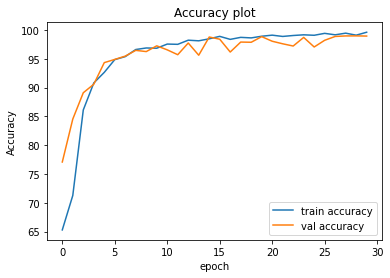

In [19]:
import matplotlib.pyplot as plt

num_epochs= 30
plt.figure()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy plot')
plt.plot(accuracy4,label='train accuracy')
plt.plot(val_acc4,label='val accuracy')    
plt.legend()

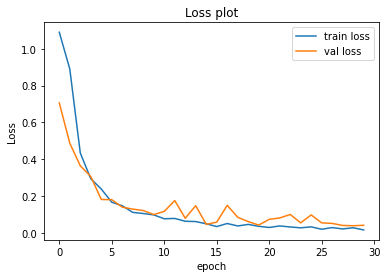

In [20]:
import matplotlib.pyplot as plt

num_epochs= 30
plt.figure()
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss plot')

plt.plot(loss4,label='train loss')
plt.plot(val_loss4,label='val loss')
    
plt.legend()

In [21]:
model4.eval() 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model4 = model4.to(device)
with torch.no_grad(): 
    correct = 0
    total = 0
    for data in test_loader3:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model4(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the {} test images: {} %'
        .format(total, (correct / total) * 100))

Test Accuracy of the model on the 3000 test images: 99.2 %


In [23]:
torch.save(model4, 'model_resnet4.pt')
#model = torch.load('model_resnet4.pt')
#model.eval()

In [24]:
model5 =torch.hub.load('pytorch/vision:v0.10.0', 'alexnet')
optimizer2 = torch.optim.Adam(model5.parameters())
criterion2 = nn.CrossEntropyLoss()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


In [25]:
model5,accuracy5,loss5,val_acc5,val_loss5=train( model5, train_loader3,val_loader3, criterion2, optimizer2,num_epochs=30)

Device: cuda:0
Epoch [1/30], Loss: 2.1346, Accuracy: 26.25%, Validation Loss : 1.5512, Validation Accuracy : 45.52%,
Epoch [2/30], Loss: 1.3209, Accuracy: 55.43%, Validation Loss : 1.1744, Validation Accuracy : 59.06%,
Epoch [3/30], Loss: 1.0204, Accuracy: 66.89%, Validation Loss : 0.9291, Validation Accuracy : 69.15%,
Epoch [4/30], Loss: 0.8101, Accuracy: 73.85%, Validation Loss : 0.7765, Validation Accuracy : 74.59%,
Epoch [5/30], Loss: 0.6188, Accuracy: 79.40%, Validation Loss : 0.6323, Validation Accuracy : 78.89%,
Epoch [6/30], Loss: 0.5115, Accuracy: 83.54%, Validation Loss : 0.6057, Validation Accuracy : 80.61%,
Epoch [7/30], Loss: 0.4514, Accuracy: 85.20%, Validation Loss : 0.5378, Validation Accuracy : 83.09%,
Epoch [8/30], Loss: 0.3617, Accuracy: 88.39%, Validation Loss : 0.4825, Validation Accuracy : 85.46%,
Epoch [9/30], Loss: 0.3134, Accuracy: 89.69%, Validation Loss : 0.5111, Validation Accuracy : 85.20%,
Epoch [10/30], Loss: 0.2639, Accuracy: 91.41%, Validation Loss : 0.

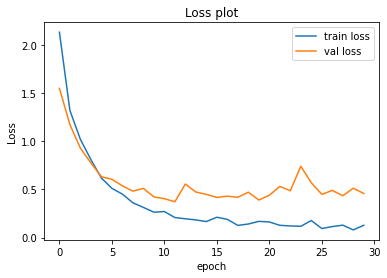

In [26]:
import matplotlib.pyplot as plt

num_epochs= 30
plt.figure()
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Loss plot')

plt.plot(loss5,label='train loss')
plt.plot(val_loss5,label='val loss')
    
plt.legend()

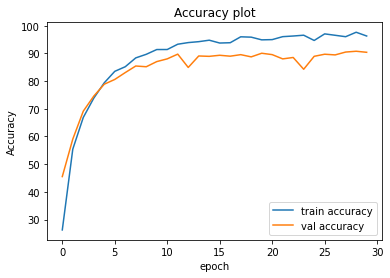

In [27]:
import matplotlib.pyplot as plt

num_epochs= 30
plt.figure()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy plot')
plt.plot(accuracy5,label='train accuracy')
plt.plot(val_acc5,label='val accuracy')    
plt.legend()

In [28]:
model5.eval() 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model5 = model5.to(device)
with torch.no_grad(): 
    correct = 0
    total = 0
    for data in test_loader3:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model5(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the {} test images: {} %'
        .format(total, (correct / total) * 100))

Test Accuracy of the model on the 3000 test images: 91.33333333333333 %


In [29]:
torch.save(model5, 'model_alexnet5.pt')
#model = torch.load('model_resnet5.pt')
#model.eval()